In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('INFY.NS.CSV')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-03,1435.000000,1435.000000,1405.150024,1410.849976,1374.349365,5242764
1,2023-04-05,1400.000000,1427.500000,1400.000000,1423.550049,1386.720947,7506334
2,2023-04-06,1416.000000,1428.400024,1410.349976,1421.900024,1385.113525,6948465
3,2023-04-10,1423.949951,1434.000000,1415.000000,1427.599976,1390.666138,4993788
4,2023-04-11,1428.900024,1433.349976,1389.000000,1406.150024,1369.771118,6942255


In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,245.000000,245.000000,245.000000,245.000000,245.000000,2.450000e+02
mean,1444.805303,1456.322652,1432.720004,1445.181631,1432.591233,6.654407e+06
std,130.452416,132.989386,128.450746,130.651183,139.745701,5.004836e+06
min,1225.949951,1230.000000,1185.300049,1223.400024,1191.749023,2.272209e+06
25%,1342.550049,1350.000000,1331.400024,1343.900024,1326.727417,4.253785e+06
50%,1434.000000,1446.800049,1427.050049,1436.599976,1421.056396,5.534710e+06
75%,1524.900024,1536.000000,1509.000000,1522.800049,1522.800049,7.419145e+06
max,1729.000000,1733.000000,1687.949951,1729.449951,1729.449951,5.317170e+07


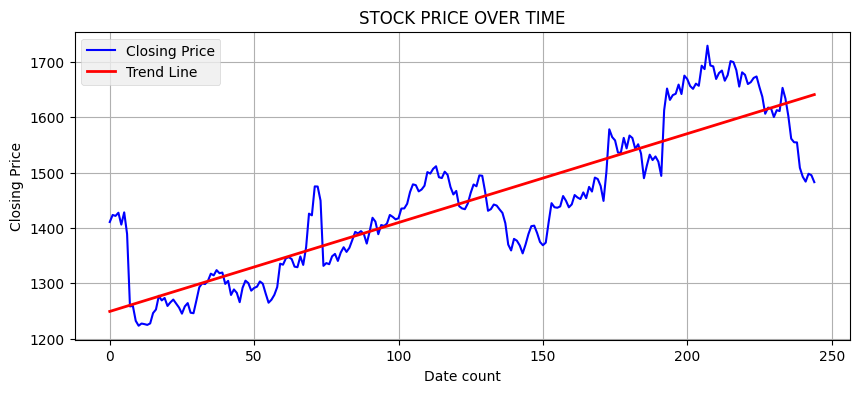

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Close'], color='b', label='Closing Price')
plt.title('STOCK PRICE OVER TIME')
plt.xlabel('Date count')
plt.ylabel('Closing Price')
plt.grid(True)
plt.style.use('bmh')

# Fit linear regression to closing price data using index as x-values
z = np.polyfit(df.index, df['Close'], 1)
p = np.poly1d(z)
plt.plot(df.index, p(df.index), color='red', label='Trend Line')

plt.legend()
plt.show()

In [9]:
#finding day name from dates
df['Date'] = pd.to_datetime(df['Date'])
df['Day_Name'] = df['Date'].dt.day_name()

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Name
0,2023-04-03,1435.000000,1435.000000,1405.150024,1410.849976,1374.349365,5242764,Monday
1,2023-04-05,1400.000000,1427.500000,1400.000000,1423.550049,1386.720947,7506334,Wednesday
2,2023-04-06,1416.000000,1428.400024,1410.349976,1421.900024,1385.113525,6948465,Thursday
3,2023-04-10,1423.949951,1434.000000,1415.000000,1427.599976,1390.666138,4993788,Monday
4,2023-04-11,1428.900024,1433.349976,1389.000000,1406.150024,1369.771118,6942255,Tuesday


In [10]:
#finding quarter from dates 

df['Date'] = pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].dt.quarter
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Name,Quarter
0,2023-04-03,1435.000000,1435.000000,1405.150024,1410.849976,1374.349365,5242764,Monday,2
1,2023-04-05,1400.000000,1427.500000,1400.000000,1423.550049,1386.720947,7506334,Wednesday,2
2,2023-04-06,1416.000000,1428.400024,1410.349976,1421.900024,1385.113525,6948465,Thursday,2
3,2023-04-10,1423.949951,1434.000000,1415.000000,1427.599976,1390.666138,4993788,Monday,2
4,2023-04-11,1428.900024,1433.349976,1389.000000,1406.150024,1369.771118,6942255,Tuesday,2


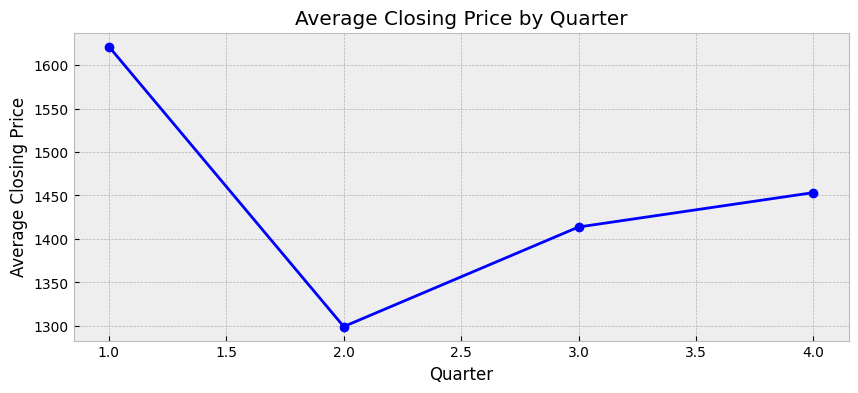

In [11]:
quarterly_data = df.groupby('Quarter')['Close'].mean()

# Plot the close price against the quarter
plt.figure(figsize=(10, 4))
plt.plot(quarterly_data.index, quarterly_data.values, color='b', marker='o', linestyle='-')
plt.title('Average Closing Price by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.style.use('bmh')

plt.show()

In [12]:
#Calculating return
df['Return'] = df['Close'].pct_change()

In [13]:
df['Return']

0           NaN
1      0.009002
2     -0.001159
3      0.004009
4     -0.015025
         ...   
240   -0.010737
241   -0.005896
242    0.009570
243   -0.001736
244   -0.008426
Name: Return, Length: 245, dtype: float64

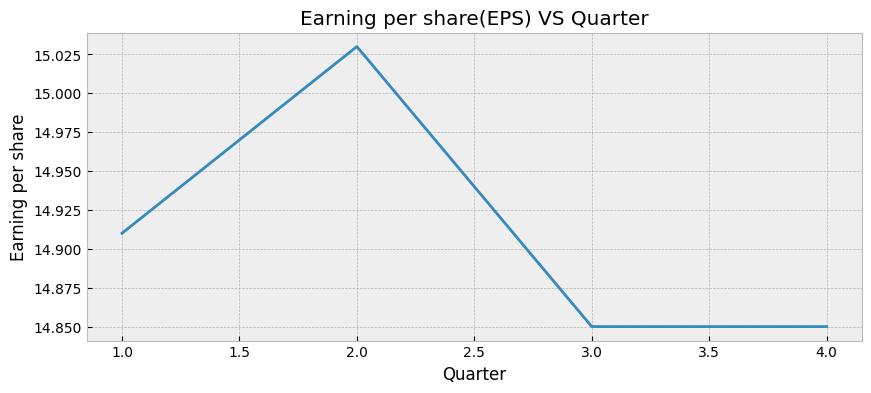

In [14]:
data2= {'Quarter':[1, 2, 3, 4],'EPS': [14.91, 15.03, 14.85, 14.85]}
df2= pd.DataFrame(data2)
plt.figure(figsize=(10,4))
plt.plot(df2['Quarter'],df2['EPS'])
plt.title('Earning per share(EPS) VS Quarter')
plt.xlabel('Quarter')
plt.ylabel('Earning per share')

plt.show()

In [15]:
#calculating volatility

trading_days_per_year = 252
volatility = df['Return'].std() * np.sqrt(trading_days_per_year)

print("Annualized Volatility:", volatility*100,"%")

Annualized Volatility: 24.787560550435494 %


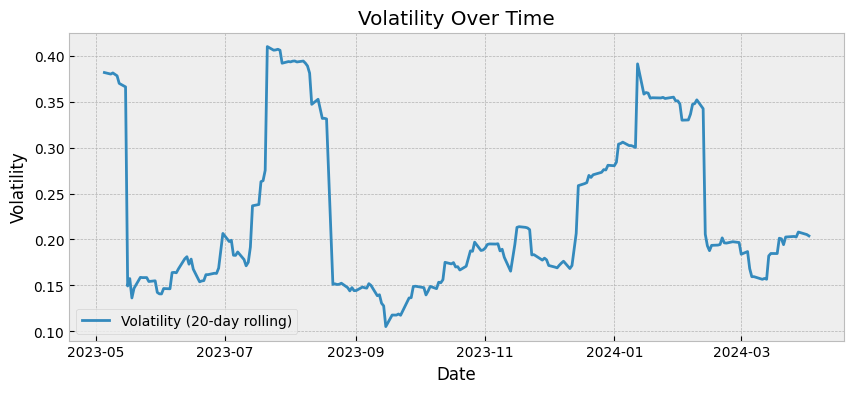

In [16]:
volatility = df['Return'].std() * np.sqrt(252)  # Assuming 252 trading days in a year

# Plot volatility over time
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Return'].rolling(window=20).std() * np.sqrt(252), label='Volatility (20-day rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Over Time')
plt.legend()
plt.show()

In [17]:
#Calculaing beta coefficient 

NSE= pd.read_csv('NSEI.csv')
import statsmodels.api as sm
stock_returns= df['Return'].dropna()
market_returns= NSE['Close'].pct_change().dropna()
# Performing regression analysis
X = sm.add_constant(market_returns)
model = sm.OLS(stock_returns, X)
results = model.fit()

# Get beta coefficient
beta = results.params['Close']

# Print beta coefficient
print("Beta Coefficient:", beta)


Beta Coefficient: 1.192920949471851


In [21]:
# Calculate a simple moving average (SMA) with a window size of 20 days
window_size = 20
df['SMA'] = df['Close'].rolling(window=window_size).mean()

In [22]:
df.loc[0 :30]

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Name,Quarter,Return,SMA
0,2023-04-03,1435.000000,1435.000000,1405.150024,1410.849976,1374.349365,5242764,Monday,2,NaN,NaN
1,2023-04-05,1400.000000,1427.500000,1400.000000,1423.550049,1386.720947,7506334,Wednesday,2,0.009002,NaN
2,2023-04-06,1416.000000,1428.400024,1410.349976,1421.900024,1385.113525,6948465,Thursday,2,-0.001159,NaN
3,2023-04-10,1423.949951,1434.000000,1415.000000,1427.599976,1390.666138,4993788,Monday,2,0.004009,NaN
4,2023-04-11,1428.900024,1433.349976,1389.000000,1406.150024,1369.771118,6942255,Tuesday,2,-0.015025,NaN
5,2023-04-12,1413.050049,1431.500000,1400.000000,1428.300049,1391.348022,5831169,Wednesday,2,0.015752,NaN
6,2023-04-13,1409.750000,1411.050049,1383.000000,1389.199951,1353.259521,11267238,Thursday,2,-0.027375,NaN
7,2023-04-17,1250.300049,1261.150024,1185.300049,1258.300049,1225.746216,53171705,Monday,2,-0.094227,NaN
8,2023-04-18,1269.949951,1269.949951,1253.099976,1259.349976,1226.768921,12430884,Tuesday,2,0.000834,NaN
9,2023-04-19,1254.349976,1254.349976,1229.400024,1232.199951,1200.321289,11307230,Wednesday,2,-0.021559,NaN


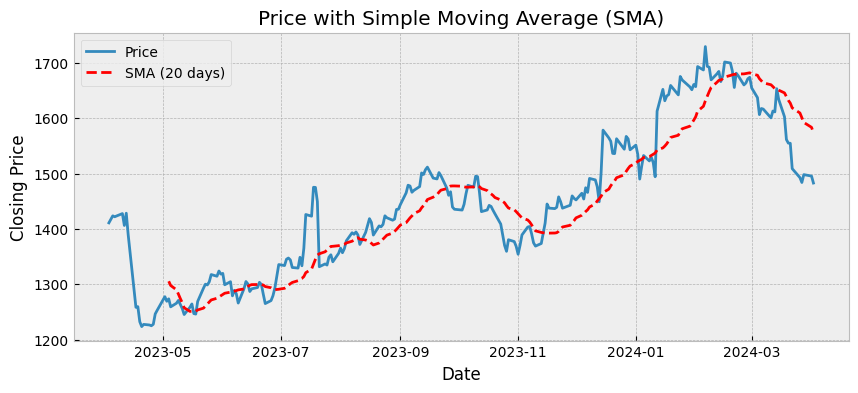

In [23]:
window_size = 20
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Close'], label='Price')
plt.plot(df['Date'], df['SMA'], label=f'SMA ({window_size} days)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Price with Simple Moving Average (SMA)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Calculating Exponential Moving Average (EMA)
window_size = 20
df['EMA'] = df['Close'].ewm(span=window_size, adjust=False).mean()

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Name,Quarter,Return,SMA,EMA
0,2023-04-03,1435.000000,1435.000000,1405.150024,1410.849976,1374.349365,5242764,Monday,2,NaN,NaN,1410.849976
1,2023-04-05,1400.000000,1427.500000,1400.000000,1423.550049,1386.720947,7506334,Wednesday,2,0.009002,NaN,1412.059507
2,2023-04-06,1416.000000,1428.400024,1410.349976,1421.900024,1385.113525,6948465,Thursday,2,-0.001159,NaN,1412.996699
3,2023-04-10,1423.949951,1434.000000,1415.000000,1427.599976,1390.666138,4993788,Monday,2,0.004009,NaN,1414.387487
4,2023-04-11,1428.900024,1433.349976,1389.000000,1406.150024,1369.771118,6942255,Tuesday,2,-0.015025,NaN,1413.602967


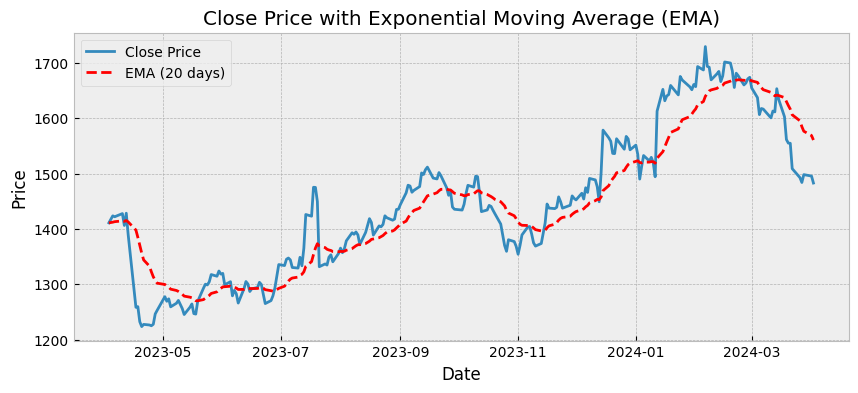

In [19]:
# Calculate Exponential Moving Average (EMA)
window_size = 20
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['EMA'], label=f'EMA ({window_size} days)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price with Exponential Moving Average (EMA)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
def calculate_rsi(data, window=14):
    # Calculate price changes
   
    delta = df['Close'].diff()
    
    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # Calculate average gain and loss over the window
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    # Calculate Relative Strength (RS) and RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi
# Calculate RSI
rsi_window = 14
df['RSI'] = calculate_rsi(df['Close'], window=rsi_window)

In [21]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Name,Quarter,Return,SMA,EMA,RSI
0,2023-04-03,1435.000000,1435.000000,1405.150024,1410.849976,1374.349365,5242764,Monday,2,NaN,NaN,1410.849976,NaN
1,2023-04-05,1400.000000,1427.500000,1400.000000,1423.550049,1386.720947,7506334,Wednesday,2,0.009002,NaN,1412.059507,100.000000
2,2023-04-06,1416.000000,1428.400024,1410.349976,1421.900024,1385.113525,6948465,Thursday,2,-0.001159,NaN,1412.996699,88.501646
3,2023-04-10,1423.949951,1434.000000,1415.000000,1427.599976,1390.666138,4993788,Monday,2,0.004009,NaN,1414.387487,91.770469
4,2023-04-11,1428.900024,1433.349976,1389.000000,1406.150024,1369.771118,6942255,Tuesday,2,-0.015025,NaN,1413.602967,44.337408


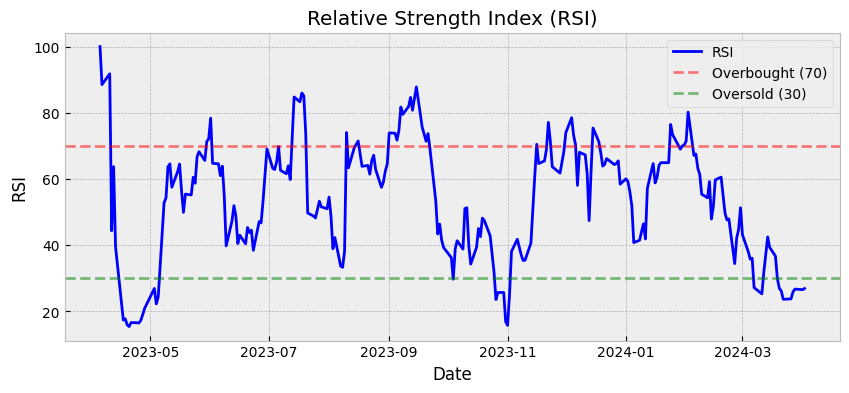

In [22]:
# Plotting RSI
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['RSI'], color='blue', label='RSI')
plt.axhline(y=70, color='r', linestyle='--', alpha=0.5, label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', alpha=0.5, label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Name,Quarter,Return,SMA,EMA,RSI
240,2024-03-26,1492.000000,1507.449951,1487.900024,1492.650024,1492.650024,8351081,Tuesday,1,-0.010737,NaN,1595.345559,23.732525
241,2024-03-27,1496.000000,1499.000000,1481.550049,1483.849976,1483.849976,6857402,Wednesday,1,-0.005896,NaN,1584.726932,25.784805
242,2024-03-28,1487.150024,1511.800049,1487.150024,1498.050049,1498.050049,12499530,Thursday,1,0.009570,NaN,1576.471991,26.696581
243,2024-04-01,1525.000000,1529.949951,1492.800049,1495.449951,1495.449951,6580002,Monday,2,-0.001736,NaN,1568.755606,26.541308
244,2024-04-02,1484.849976,1493.150024,1480.900024,1482.849976,1482.849976,7277710,Tuesday,2,-0.008426,NaN,1560.574118,26.880045


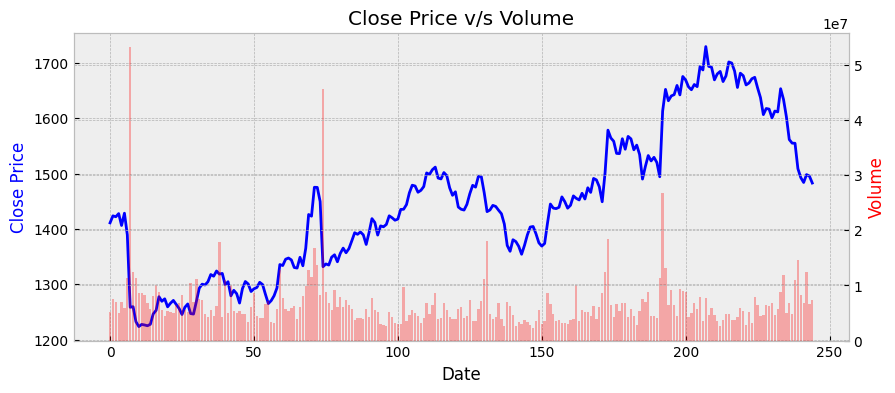

In [41]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot Close Price
ax1.plot(df.index, df['Close'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')

# Create a second y-axis for Volume
ax2 = ax1.twinx()
ax2.bar(df.index,df['Volume'], color='red', alpha=0.3)
ax2.set_ylabel('Volume', color='red')

plt.title('Close Price v/s Volume')
plt.show()

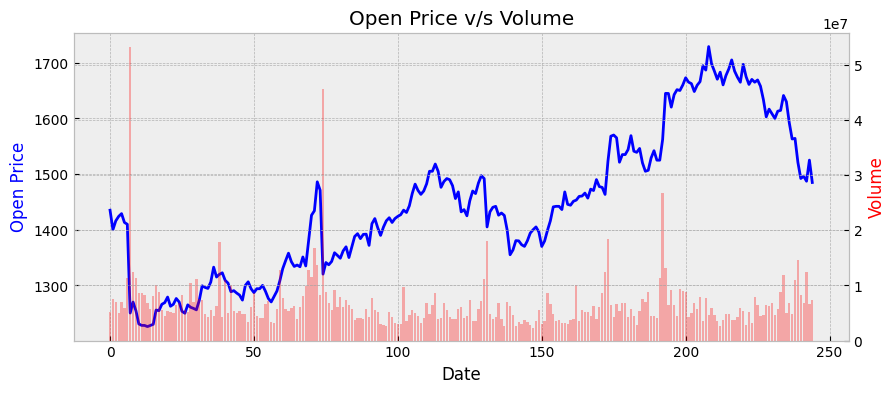

In [40]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot Close Price
ax1.plot(df.index, df['Open'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Open Price', color='blue')

# Create a second y-axis for Volume
ax2 = ax1.twinx()
ax2.bar(df.index,df['Volume'], color='red', alpha=0.3)
ax2.set_ylabel('Volume', color='red')

plt.title('Open Price v/s Volume')
plt.show()

In [44]:
def calculate_support_resistance(df, window):
    rolling_max = df.rolling(window=window, min_periods=1).max()
    rolling_min = df.rolling(window=window, min_periods=1).min()

    support = rolling_max.shift(1)
    resistance = rolling_min.shift(1)

    return support, resistance
window_size = 3  
support, resistance = calculate_support_resistance(df['Close'], window_size)

print("Support levels:")
print(support)
print("\nResistance levels:")
print(resistance)


Support levels:
0              NaN
1      1410.849976
2      1423.550049
3      1423.550049
4      1427.599976
          ...     
240    1554.949951
241    1554.699951
242    1508.849976
243    1498.050049
244    1498.050049
Name: Close, Length: 245, dtype: float64

Resistance levels:
0              NaN
1      1410.849976
2      1410.849976
3      1410.849976
4      1421.900024
          ...     
240    1508.849976
241    1492.650024
242    1483.849976
243    1483.849976
244    1483.849976
Name: Close, Length: 245, dtype: float64


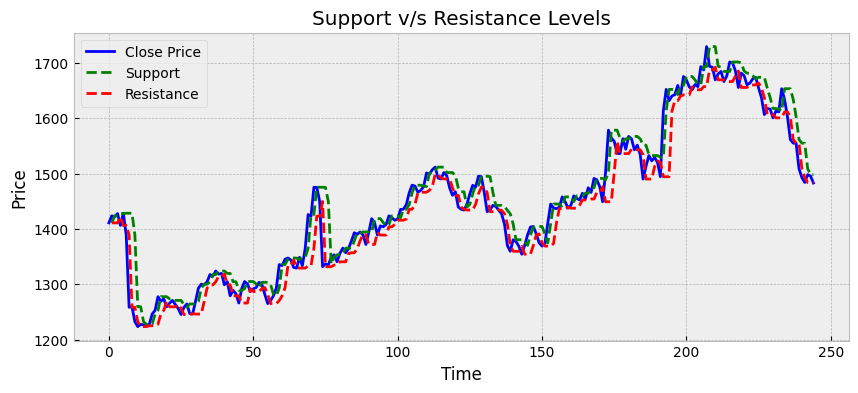

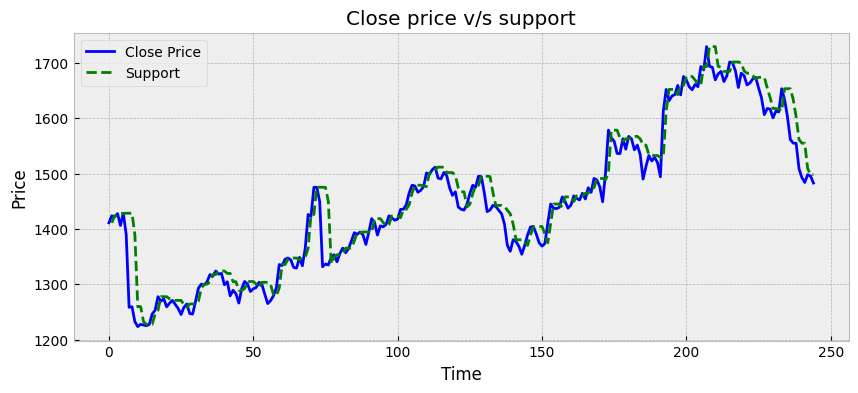

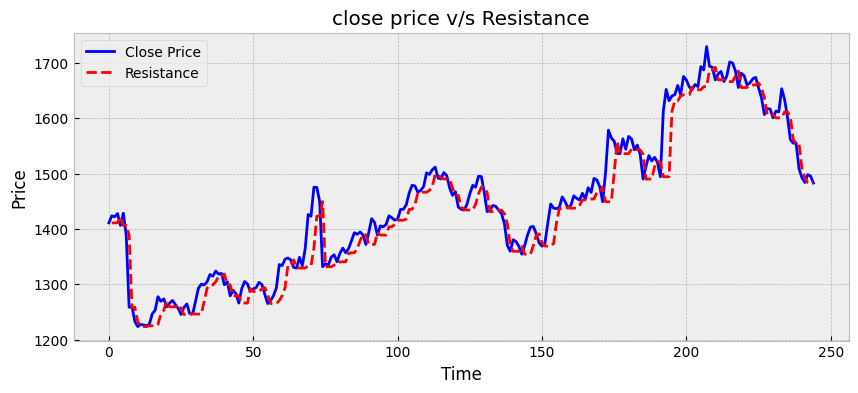

In [58]:
plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(support, label='Support', linestyle='--', color='green')
plt.plot(resistance, label='Resistance', linestyle='--', color='red')

plt.title('Support v/s Resistance Levels')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(support, label='Support', linestyle='--', color='green')

plt.title('Close price v/s support')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(resistance, label='Resistance', linestyle='--', color='red')

plt.title('close price v/s Resistance')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

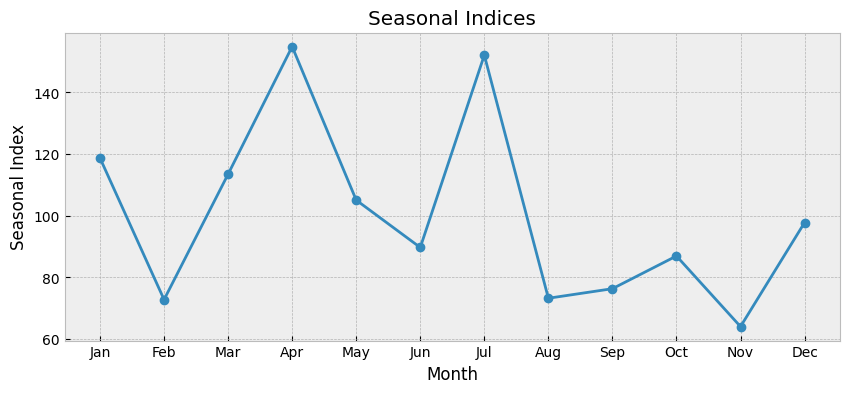

In [59]:
df.set_index('Date', inplace=True)

# Calculate average sales for each month
monthly_avg = df.groupby(df.index.month)['Volume'].mean()

# Calculate overall average sales
overall_avg = df['Volume'].mean()

# Calculate seasonal indices
seasonal_indices = (monthly_avg / overall_avg) * 100

# Plot seasonal indices
plt.figure(figsize=(10, 4))
plt.plot(seasonal_indices.index, seasonal_indices.values, marker='o', linestyle='-')
plt.title('Seasonal Indices')
plt.xlabel('Month')
plt.ylabel('Seasonal Index')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [ ]:
df.